In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv(r"M:\Ayush\ABD\Ducat\Python\CSV files\healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [11]:
data['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

In [12]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [13]:
df = df[df['Billing Amount'] >= 0]
df = df[df['Age'] >= 0]

In [14]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df = df[df['Length of Stay'] >= 0]  # remove inconsistent dates

In [15]:
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

In [16]:
df['Test Category'] = df['Test Results'].apply(lambda x: 'Positive' if 'positive' in x.lower()
                                               else 'Negative' if 'negative' in x.lower() else 'Other')

In [17]:
df.select_dtypes(include='object').nunique()

Name                  9378
Gender                   2
Blood Type               8
Medical Condition        6
Doctor                9416
Hospital              8639
Insurance Provider       5
Admission Type           3
Medication               5
Test Results             3
Test Category            1
dtype: int64

In [18]:
le = LabelEncoder()
for col in ['Gender', 'Blood Type', 'Admission Type', 'Medical Condition', 'Doctor',
            'Hospital', 'Insurance Provider', 'Medication', 'Test Category', 'Test Results']:
    df[col] = le.fit_transform(df[col])

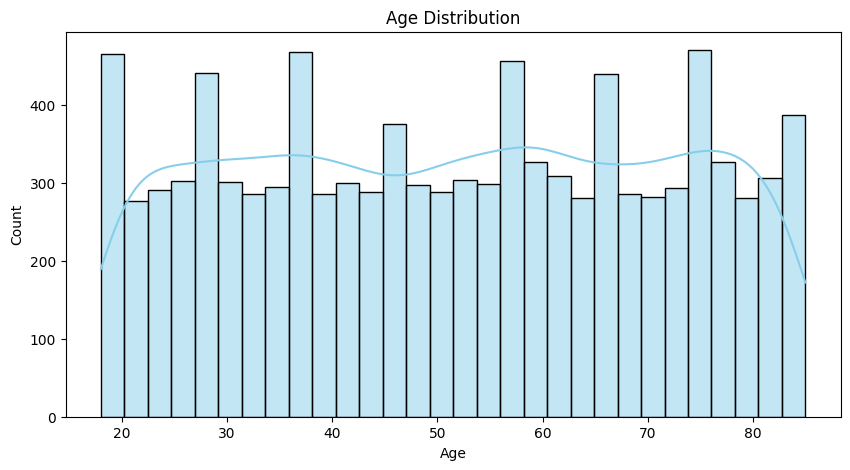

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

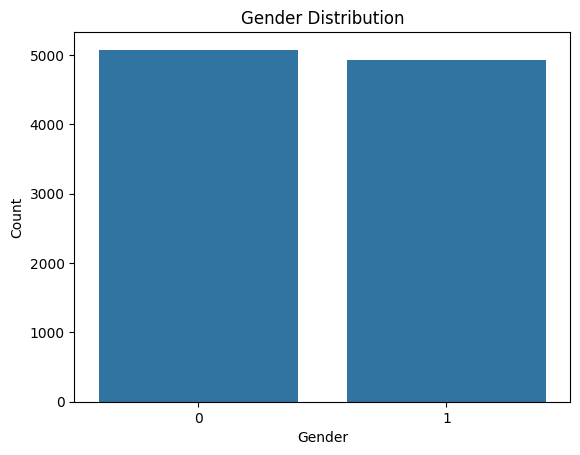

In [20]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

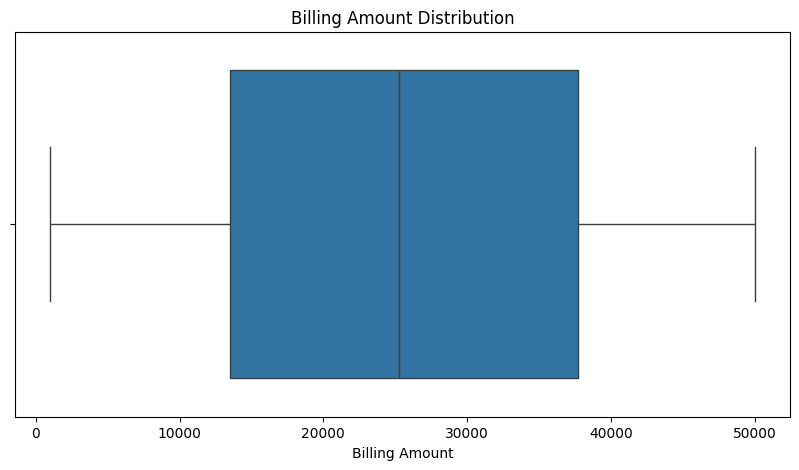

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Billing Amount')
plt.title("Billing Amount Distribution")
plt.show()

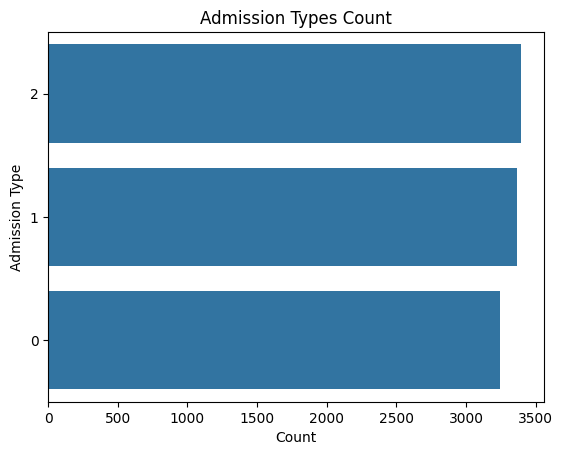

In [22]:
sns.countplot(y='Admission Type', data=df, order=df['Admission Type'].value_counts().index)
plt.title("Admission Types Count")
plt.xlabel("Count")
plt.ylabel("Admission Type")
plt.show()

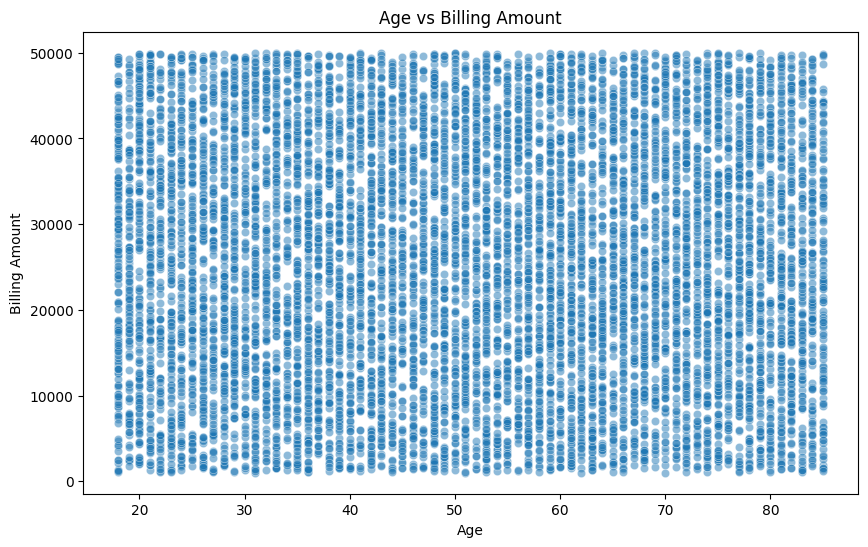

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Billing Amount', data=df, alpha=0.5)
plt.title("Age vs Billing Amount")
plt.show()

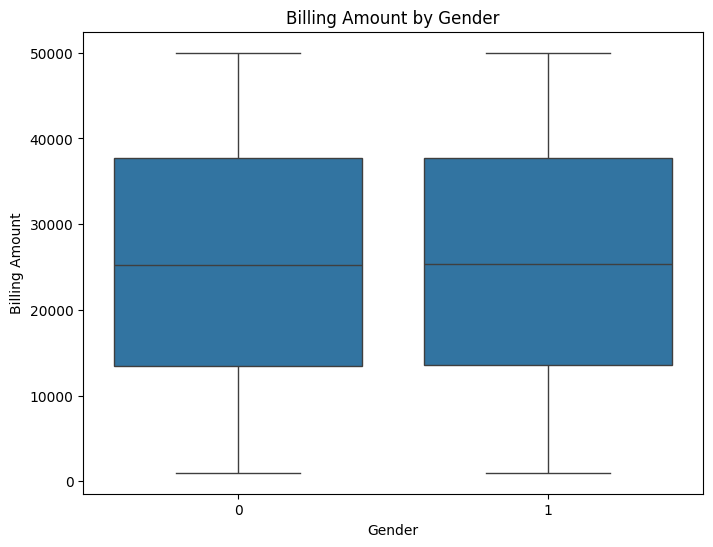

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title("Billing Amount by Gender")
plt.show()

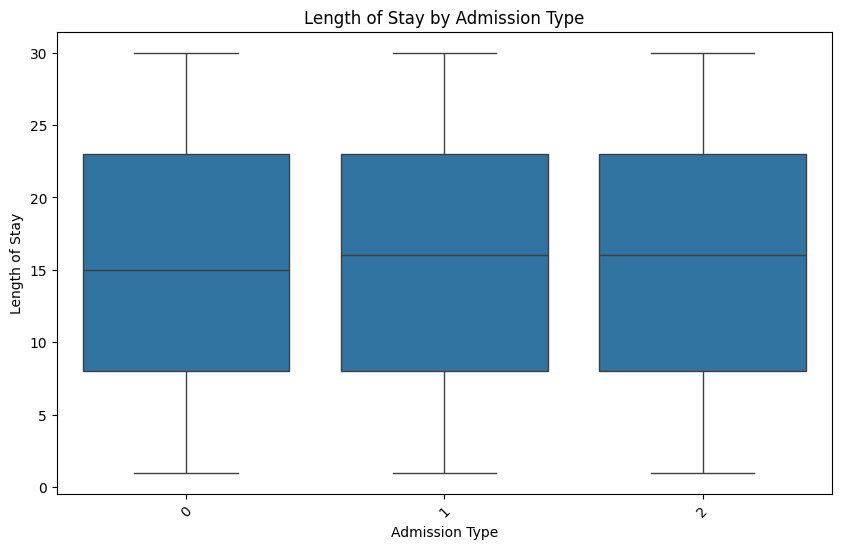

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Length of Stay', data=df)
plt.title("Length of Stay by Admission Type")
plt.xticks(rotation=45)
plt.show()

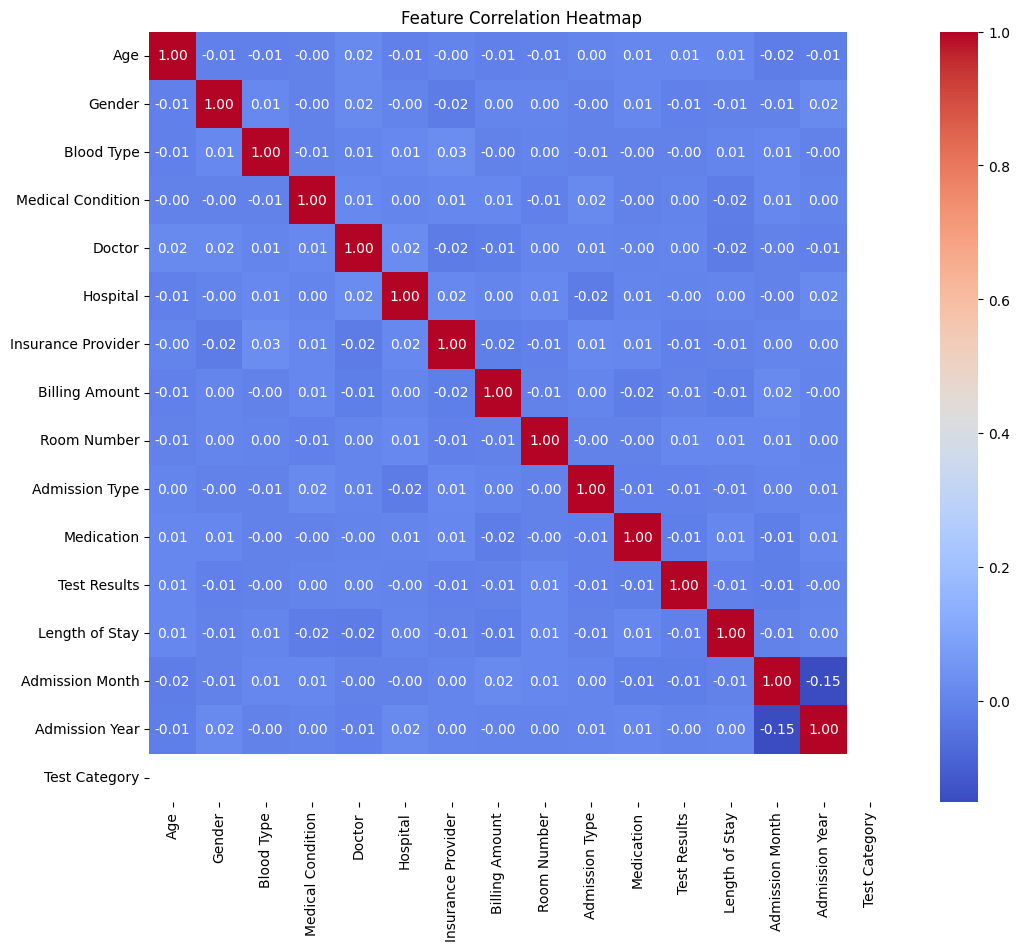

In [26]:
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

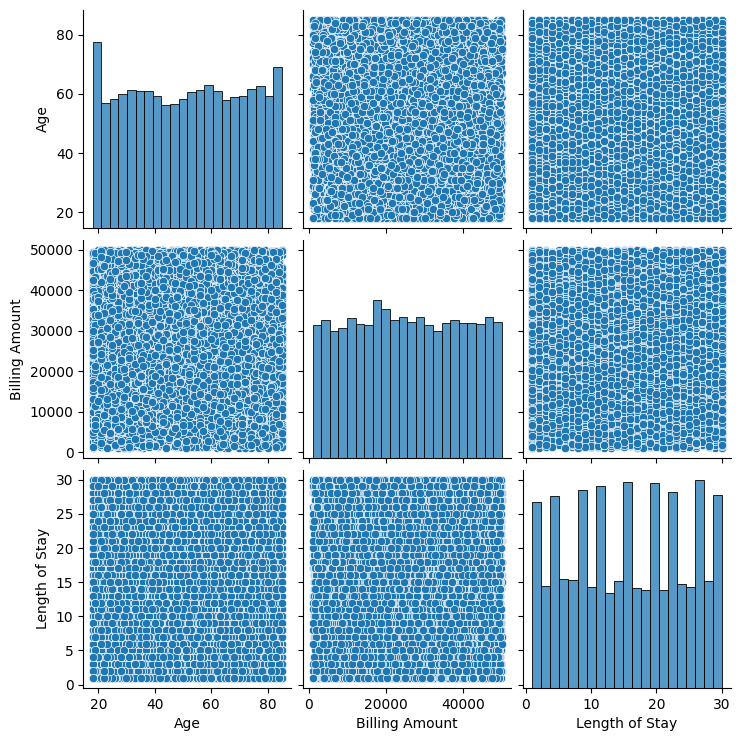

In [27]:
subset = df[['Age', 'Billing Amount', 'Length of Stay']]
sns.pairplot(subset)
plt.show()

In [28]:
features = df.drop(columns=['Name', 'Billing Amount', 'Date of Admission', 'Discharge Date'])

X_reg = features
y_reg = df['Billing Amount']

In [29]:
categorical_cols = X_reg.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: []


In [30]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X_reg.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le

In [31]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_encoded, y_reg, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_reg.predict(X_test_reg)

In [33]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 12435.132914639362
RMSE: 14381.308018220467


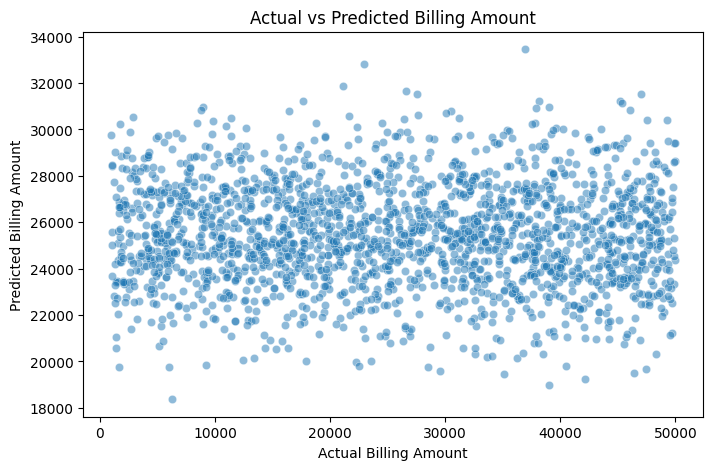

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.5)
plt.xlabel("Actual Billing Amount")
plt.ylabel("Predicted Billing Amount")
plt.title("Actual vs Predicted Billing Amount")
plt.show()